In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/B5yO4wkEbQk4dVGn8140yV1bx/insurance_encoded.csv")
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,BMI_group
0,0,19,0,27.900,0,1,3,16884.92400,3
1,1,18,1,33.770,1,0,2,1725.55230,2
2,2,28,1,33.000,3,0,2,4449.46200,2
3,3,33,1,22.705,0,0,1,21984.47061,1
4,4,32,1,28.880,0,0,1,3866.85520,3


In [3]:
df = df.iloc[:, 1:]
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   region     1338 non-null   int64  
 6   charges    1338 non-null   float64
 7   BMI_group  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [11]:
_bins = [num for num in np.arange(0, 101, 10)]
_bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [16]:
import warnings

In [17]:
warnings.filterwarnings('ignore')

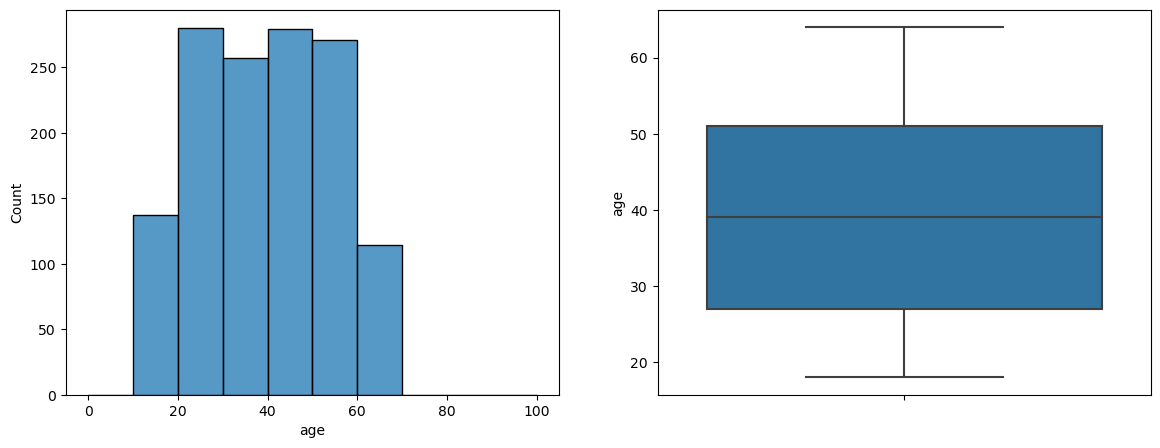

In [23]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='age', data=df)
plt.show()

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'BMI_group'],
      dtype='object')

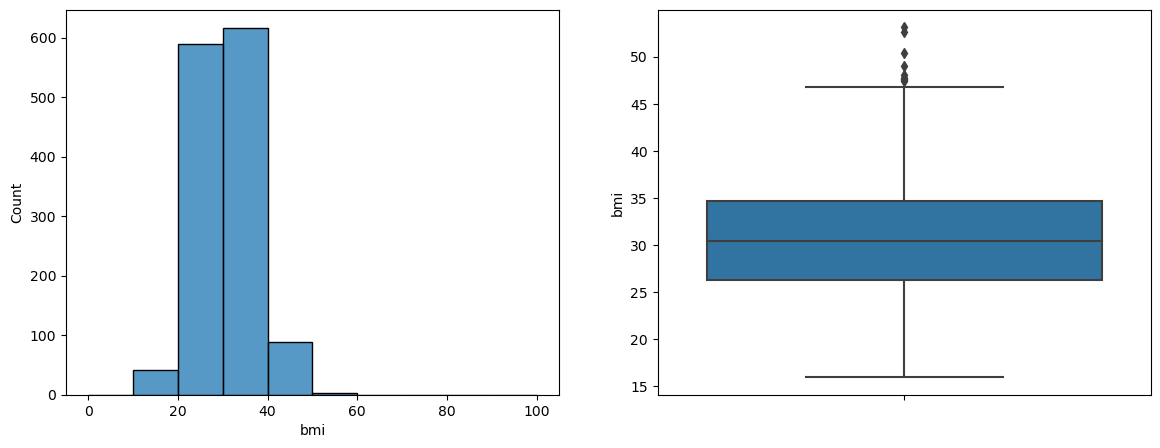

In [25]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='bmi', bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='bmi', data=df)
plt.show()

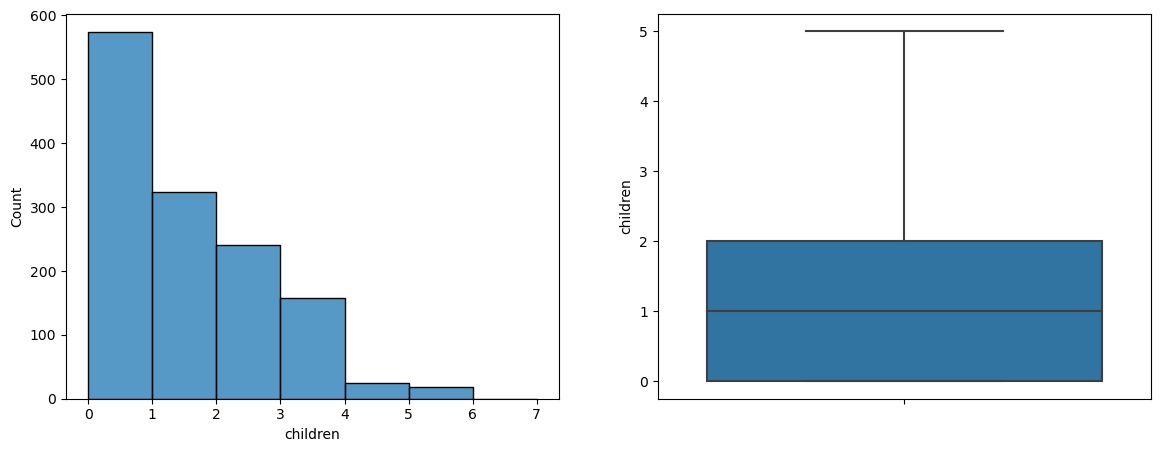

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='children', bins=[0, 1, 2, 3, 4, 5, 6, 7])

plt.subplot(1, 2, 2)
sns.boxplot(y='children', data=df)
plt.show()

In [29]:
_bins = [num for num in np.arange(0, 100000, 10000)]
_bins

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

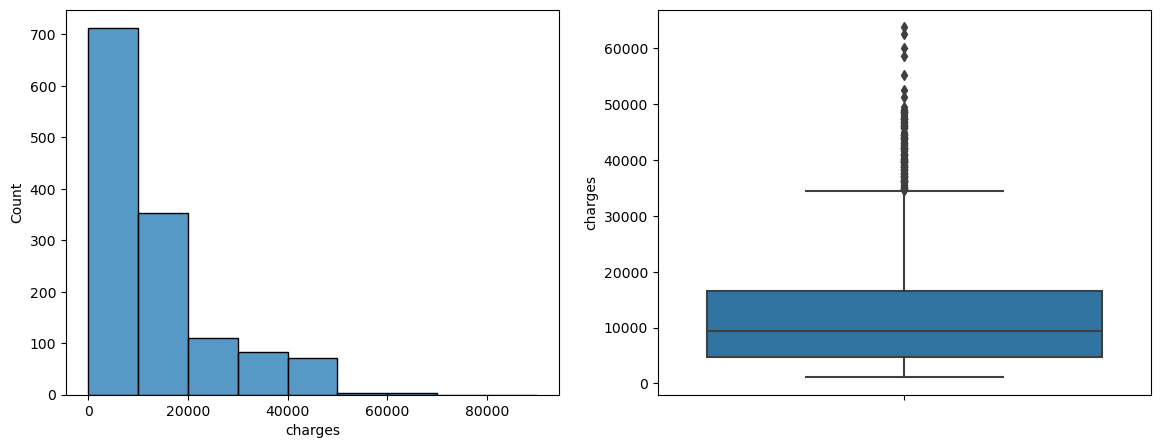

In [31]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='charges', bins=_bins)

plt.subplot(1, 2, 2)
sns.boxplot(y='charges', data=df)
plt.show()

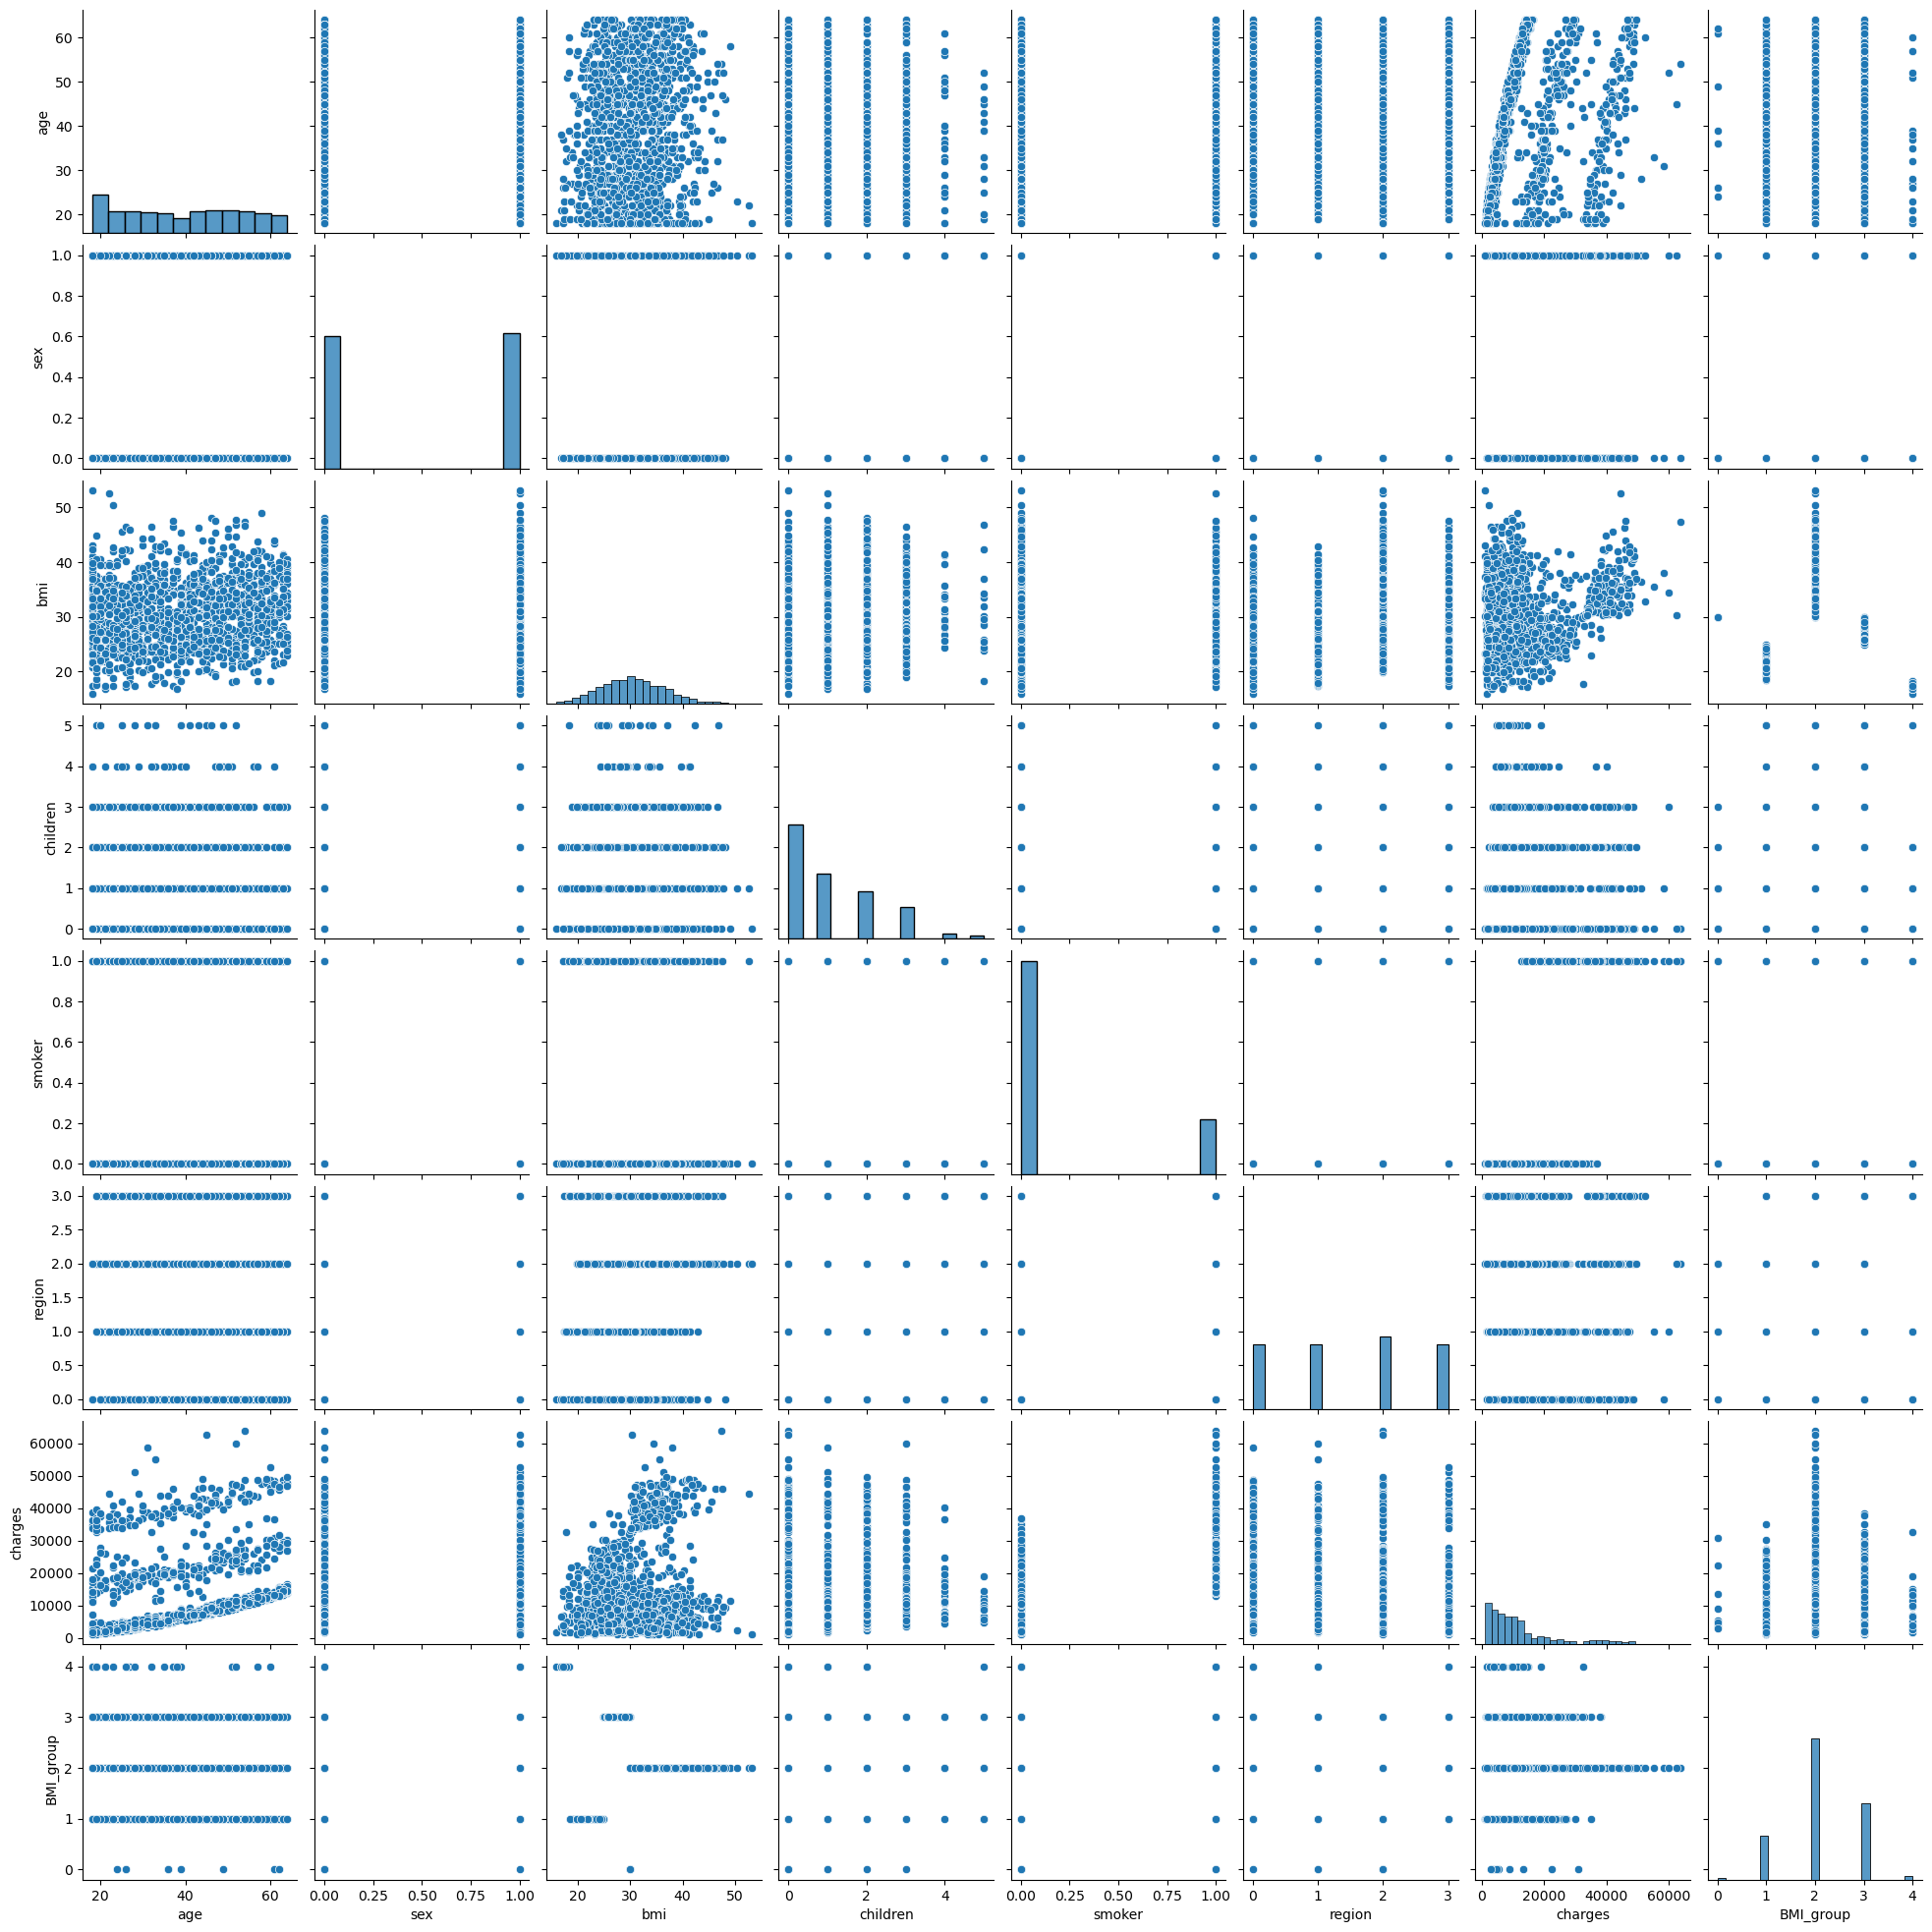

In [33]:
grid = sns.pairplot(df)
grid.xticks_top()

plt.show()

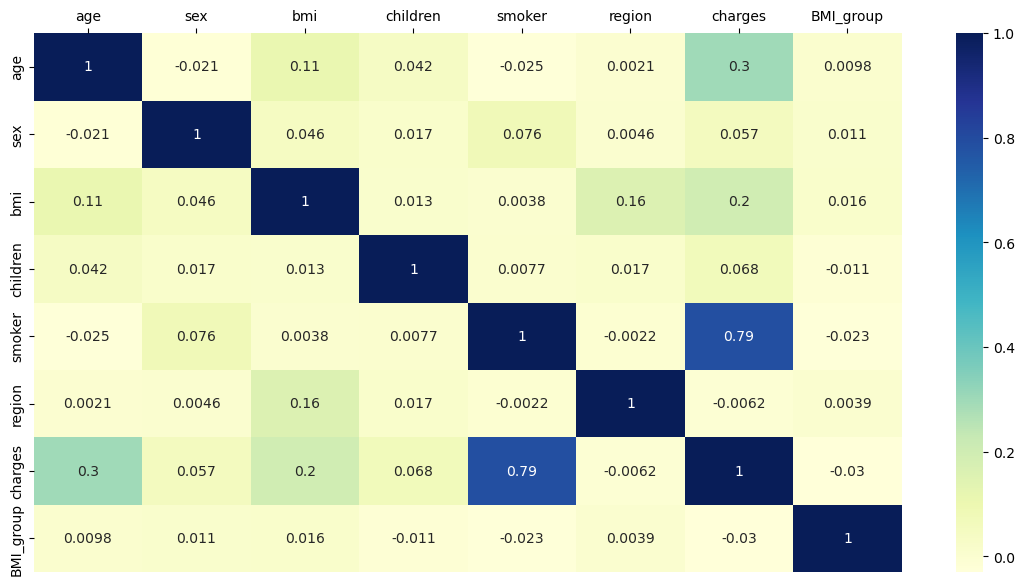

In [46]:
plt.figure(figsize=(14, 7))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
ax.xaxis.tick_top()
#plt.xaxis_ticks.rotation(0)
plt.show()

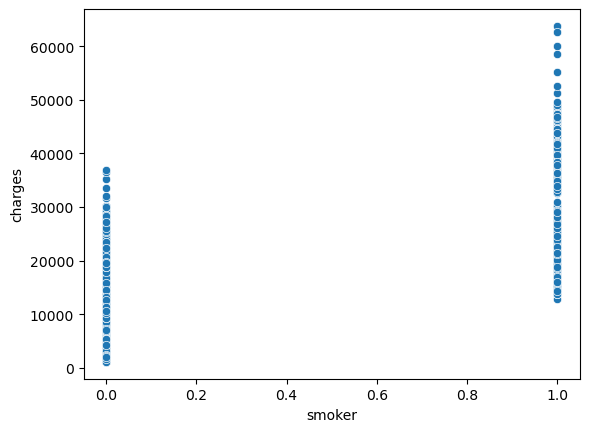

In [47]:
sns.scatterplot(x='smoker', y='charges', data=df)
plt.show()

In [50]:
df['smoker'].value_counts().reset_index()

,index,smoker
0,0,1064
1,1,274


In [51]:
_vars = ['smoker', 'bmi', 'age', 'charges']
corr_df = df[_vars].corr()['smoker']
corr_df = corr_df.round(4)
for value in corr_df.values[1:]:
    print("{:0.4f}".format(value))

0.0038
-0.0250
0.7873


### split into train and test data set

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [57]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(1338, 8)
(936, 8)
(402, 8)


In [58]:
y_train = df_train.pop('charges')
X_train = df_train

In [72]:
X_train  = df_train['smoker']
X_train

966     1
522     0
155     0
671     0
1173    0
       ..
802     0
53      1
350     0
79      0
792     0
Name: smoker, Length: 936, dtype: int64

### Scalling/Normalisation of data

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [64]:
#scaler = MinMaxScaler()
#scaler.fit(X_train)

In [65]:
## no ned of scaler here

In [74]:
X_train.shape

(936,)

In [81]:
#we should reshape your X to be a 2D array not 1D array. 
# Fitting a model requires requires a 2D array. i.e (n_samples, n_features)
X_train = X_train.values.reshape(-1, 1)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [82]:
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
lr.intercept_

8512.964143143257

In [85]:
lr.coef_

array([23946.49304499])

In [87]:
# charges = 8512.96 + 23946.49 * smoker

In [88]:
y_train_pred = lr.predict(X_train)

In [89]:
res_train = y_train - y_train_pred
res_train

966    -8492.074138
522     1353.340707
155    -1564.263343
671    -4569.368743
1173   -2055.120743
           ...     
802    -6409.884143
53      5283.118512
350     3317.643057
79     -1941.939793
792    -5781.051943
Name: charges, Length: 936, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

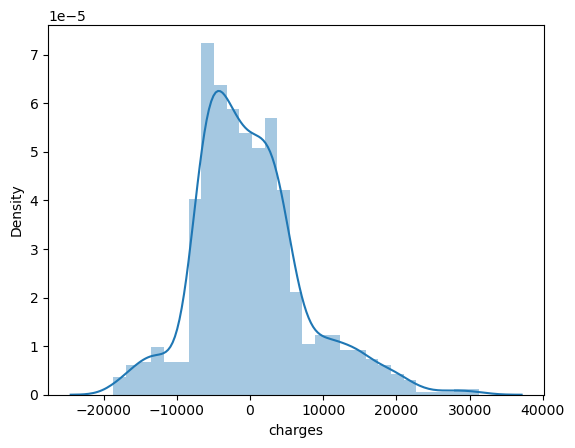

In [91]:
sns.distplot(res_train )

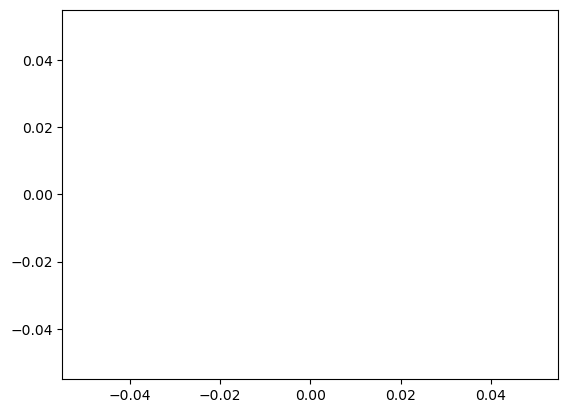

In [102]:
plt.plot(data = 8512.96 + 23946.49 * X_train)
plt.show()

In [105]:
import statsmodels.api as sm

In [107]:
X_train= df_train['smoker']

In [116]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,smoker
966,1.0,1
522,1.0,0
155,1.0,0
671,1.0,0
1173,1.0,0


In [117]:
lr_sm = sm.OLS(y_train, X_train_sm).fit()

In [118]:
lr_sm.params

const      8512.964143
smoker    23946.493045
dtype: float64

In [119]:
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          1.60e-193
Time:                        13:30:38   Log-Likelihood:                -9688.1
No. Observations:                 936   AIC:                         1.938e+04
Df Residuals:                     934   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8512.9641    275.884     30.857      0.0

In [120]:
df_test.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'BMI_group'],
      dtype='object')

In [123]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [124]:
y_test = df_test.pop('charges')
X_test = df_test['smoker']

In [125]:
X_test

12      0
306     0
318     0
815     0
157     1
       ..
710     0
1005    0
389     0
923     0
1164    0
Name: smoker, Length: 402, dtype: int64

In [126]:
y_test

12       1826.84300
306     20177.67113
318      7421.19455
815      1877.92940
157     15518.18025
           ...     
710      1727.54000
1005     4433.38770
389      4618.07990
923      4320.41085
1164     7153.55390
Name: charges, Length: 402, dtype: float64

In [127]:
X_test_sm = sm.add_constant(X_test)

In [128]:
y_test_pred = lr_sm.predict(X_test_sm)

In [129]:
y_test_pred

12       8512.964143
306      8512.964143
318      8512.964143
815      8512.964143
157     32459.457188
            ...     
710      8512.964143
1005     8512.964143
389      8512.964143
923      8512.964143
1164     8512.964143
Length: 402, dtype: float64

In [130]:
res_test = y_test - y_test_pred

<AxesSubplot:ylabel='Density'>

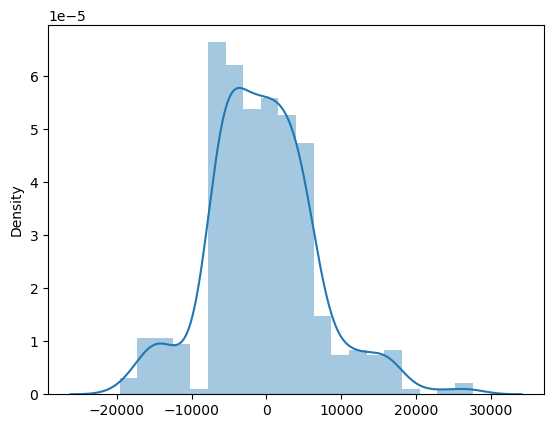

In [131]:
sns.distplot(res_test )

<Figure size 1000x500 with 0 Axes>

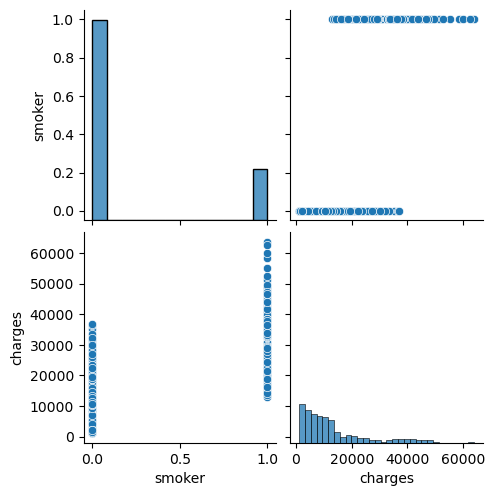

In [133]:
plt.figure(figsize=(10,5))
_vars = ['smoker', 'charges']
sns.pairplot(data=df[_vars])
plt.show()

In [134]:
# Read training data
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/72Boxj99702g8BwK5powGz1g0/insurance_training.csv")

train.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,46,0,19.95,2,0,1,1,9193.83850
1,1285,47,0,24.32,0,0,0,1,8534.67180
2,1142,52,0,24.86,0,0,2,1,27117.99378
3,969,39,0,34.32,5,0,2,2,8596.82780
4,486,54,0,21.47,3,0,1,1,12475.35130


In [151]:
train['BMI_group'].value_counts()

2    558
3    304
1    188
4     13
0      7
Name: BMI_group, dtype: int64

In [136]:

# Read tes
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/gxVjwe1k3YEogYK23O8PPnXod/insurance_test.csv")
test.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group
0,764,45,0,25.175,2,0,0,3
1,887,36,0,30.020,0,0,1,2
2,890,64,0,26.885,0,1,1,3
3,1293,46,1,25.745,3,0,1,3
4,259,19,1,31.920,0,1,1,2


In [ ]:
# standardrising of data

In [141]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [142]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
966,51,1,24.795,2,1,1,23967.38305,1
522,51,0,33.915,0,0,0,9866.30485,2
155,44,1,39.520,0,0,1,6948.70080,2
671,29,0,31.160,0,0,0,3943.59540,2
1173,38,1,29.260,2,0,1,6457.84340,3


In [143]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
12,23,1,34.400,0,0,3,1826.84300,2
306,28,0,27.500,2,0,3,20177.67113,3
318,44,0,27.645,0,0,1,7421.19455,3
815,20,0,31.460,0,0,2,1877.92940,2
157,18,1,25.175,0,1,0,15518.18025,3


In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StndardScaler()

In [146]:
scaler.fit(df_train)
df_train = scaler.transform(df_train)

In [149]:
pd.DataFrame(df_train)

,0,1,2,3,4,5,6,7
0,0.847399,1.004283,-0.966302,0.744470,2.035401,-0.490565,0.890355,-1.547646
1,0.847399,-0.995736,0.502693,-0.914635,-0.491304,-1.405243,-0.272340,-0.154765
2,0.349938,1.004283,1.405512,-0.914635,-0.491304,-0.490565,-0.512910,-0.154765
3,-0.716049,-0.995736,0.058934,-0.914635,-0.491304,-1.405243,-0.760694,-0.154765
4,-0.076457,1.004283,-0.247106,0.744470,-0.491304,-0.490565,-0.553383,1.238117
...,...,...,...,...,...,...,...,...
931,-1.284576,1.004283,-1.368181,-0.085082,-0.491304,1.338792,-0.912452,-1.547646
932,-0.218588,1.004283,0.585646,-0.914635,2.035401,0.424114,2.026180,-0.154765
933,1.273794,-0.995736,-1.226436,-0.914635,-0.491304,-0.490565,-0.110375,-1.547646
934,0.136741,-0.995736,0.349672,-0.914635,-0.491304,-0.490565,-0.544051,-0.154765


In [153]:
num_vars = ['age', 'bmi', 'children', 'BMI_group', 'charges']

# standarisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaler.fit(train[num_vars])
train[num_vars] = scaler.transform(train[num_vars])

In [156]:
train.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,0.472227,0,-1.756525,0.734336,0,1,-1.552241,-0.345621
1,1285,0.543313,0,-1.033082,-0.911192,0,0,-1.552241,-0.400488
2,1142,0.898745,0,-0.943687,-0.911192,0,2,-1.552241,1.146332
3,969,-0.025379,0,0.622393,3.202629,0,2,-0.165849,-0.395314
4,486,1.040918,0,-1.504893,1.557100,0,1,-1.552241,-0.072478


In [161]:
import numpy as np
import pandas as pd

# Read training data
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/QNdMORzykKkG4L3WQ17Xx53o3/insurance_training.csv")
# train = train.iloc[:, 1:]
# Read test data
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/Mq5p8YpQoz3KbWJRE4Mey1Yoq/insurance_test.csv")
# test = test.iloc[:, 1:]

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['age', 'bmi', 'children', 'BMI_group', 'charges']

# standarisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[num_vars])
train[num_vars] = scaler.transform(train[num_vars])

#create target and dirver variables
y_train = train.pop('charges')
X_train = train

# Linear regression
#import required libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr = LinearRegression()
lr.fit(X_train, y_train)


# using sm
X_train_sm = sm.add_constant(X_train)
lr_sm = sm.OLS(y_train, X_train_sm).fit()

# standarisation
num_vars = ['age', 'bmi', 'children', 'BMI_group']
scaler.fit(test[num_vars])
test[num_vars] = scaler.transform(test[num_vars])

#create target and dirver variables
X_test = test

#y_test_pred = lr.predict(X_test)

X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_sm.predict(X_test_sm)

# Write the output
y_test_pred

0     -0.379552
1     -0.500190
2      1.953741
3     -0.306798
4      1.122766
         ...   
263    2.132481
264   -0.147076
265   -0.499948
266    2.289432
267   -0.072345
Length: 268, dtype: float64